# LENET5 MNIST CLASSIFICATION

Q2. Write a program to implement the new CNN model. The model should contains following
things : (Note : use any grayscale dataset with the 10 classes)
1. Convolution #1. Input = 32x32x1. Output = 28x28x6 conv2d 
2. SubSampling #1. Input = 28x28x6. Output = 14x14x6. SubSampling is simply Average Pooling so we use avgpool
3. Convolution #2. Input = 14x14x6. Output = 10x10x16 conv2d
4. SubSampling #2. Input = 10x10x16. Output = 5x5x16 avg_pool 
5. Fully Connected #1. Input = 5x5x16. Output = 120 
6. Fully Connected #2. Input = 120. Output = 84
7. Output 10 import tensorflow as tf

In [1]:
  
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

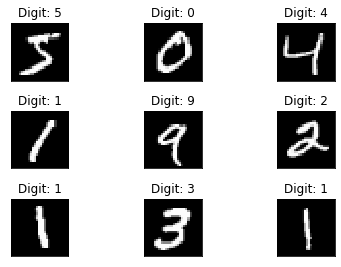

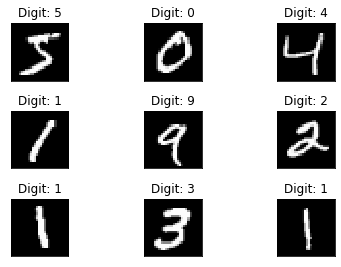

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:

x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [6]:

x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [7]:

x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [8]:
from tensorflow.keras import datasets, layers, models, losses
model = models.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

In [9]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [10]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 24s 26ms/step - loss: 0.6806 - accuracy: 0.7908 - val_loss: 0.0874 - val_accuracy: 0.9775
Epoch 2/40
907/907 [==============================] - 21s 24ms/step - loss: 0.1067 - accuracy: 0.9676 - val_loss: 0.0654 - val_accuracy: 0.9840
Epoch 3/40
907/907 [==============================] - 21s 23ms/step - loss: 0.0644 - accuracy: 0.9801 - val_loss: 0.0538 - val_accuracy: 0.9860
Epoch 4/40
907/907 [==============================] - 21s 24ms/step - loss: 0.0524 - accuracy: 0.9839 - val_loss: 0.0626 - val_accuracy: 0.9845
Epoch 5/40
907/907 [==============================] - 21s 23ms/step - loss: 0.0417 - accuracy: 0.9870 - val_loss: 0.0443 - val_accuracy: 0.9905
Epoch 6/40
907/907 [==============================] - 21s 23ms/step - loss: 0.0361 - accuracy: 0.9882 - val_loss: 0.0464 - val_accuracy: 0.9895
Epoch 7/40
907/907 [==============================] - 21s 23ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0478 - val_accuracy:

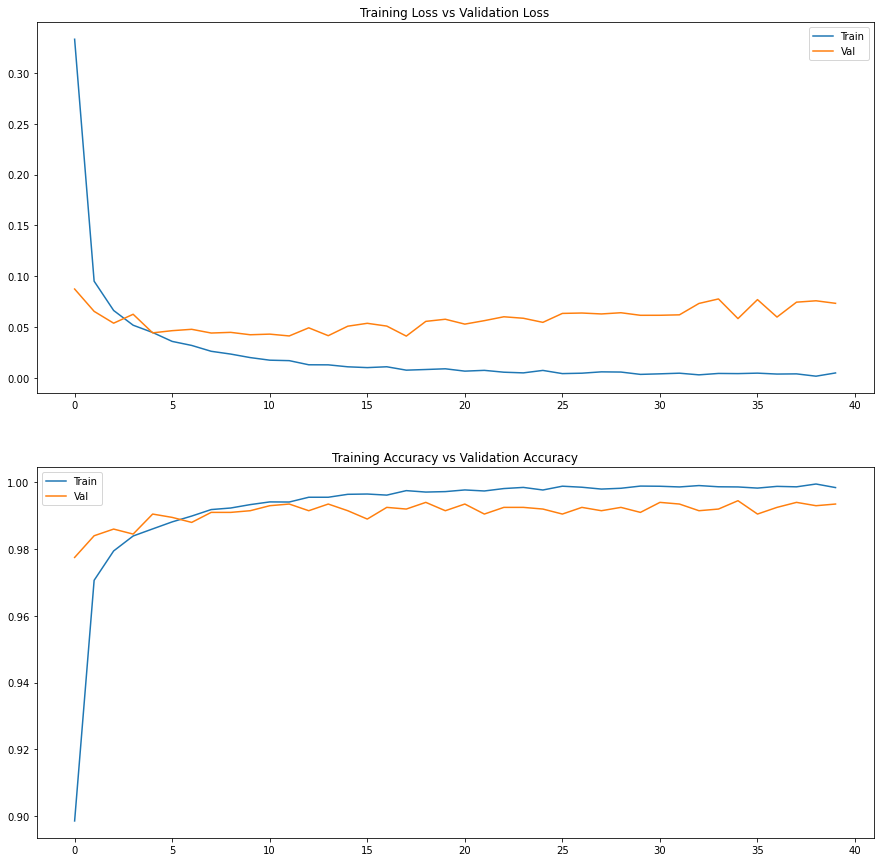

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(15,15)) 
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy']) 
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].legend(['Train', 'Val'])

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0647 - accuracy: 0.9883


[0.0646616667509079, 0.9883000254631042]

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 0.0646616667509079
Test accuracy: 0.9883000254631042


https://github.com/nehrjv/Deep-Learning-lab-Assignment/tree/main/LENET%20AND%20ALEXNET